In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
c  = 299792458
h  = 6.626e-34
m  = 2.0e-29
ℓ  = 4e-9
nu = 3
Eu = nu*nu*h*h/8/m/ℓ/ℓ
nd = 2
Ed = nd*nd*h*h/8/m/ℓ/ℓ
ν  = (Eu-Ed)/h
λ  = c/ν
print ('{0:.4f} THz'.format(ν/1e12))
print ('{0:.4f} μm'.format(λ/1e-6))

1.2941 THz
231.6537 μm


In [3]:

def FrecuenciaLambda(nu,nd):
    c  = 299792458
    h  = 6.626e-34
    m  = 2.0e-29
    ℓ  = 4e-9
    Eu = nu*nu*h*h/8/m/ℓ/ℓ
    Ed = nd*nd*h*h/8/m/ℓ/ℓ
    ν  = (Eu-Ed)/h
    λ  = c/ν
    # print ('{0:.4f} THz'.format(ν/1e12))
    # print ('{0:.4f} μm'.format(λ/1e-6))
    return ν,λ

FrecuenciaLambda(4,3)

(1811796875000.0, 0.00016546692520374282)

In [4]:
nvals = np.arange(2,7)


nl, ml, νl, λl = [],[],[],[]
for n in nvals:
    mvals = np.arange(1,n.max())
    for m in mvals:
        ν,λ = FrecuenciaLambda(n,m)
        nl.append(n)
        ml.append(m)
        νl.append(ν/1e12) # THz
        λl.append(λ/1e-6) # μm

nl = array(nl)
ml = array(ml)
νl = array(νl)
λl = array(λl)

νmax = νl.max()

In [5]:
# import seaborn as sns; sns.set()
import matplotlib.cm as cmx
import matplotlib.colors as colors


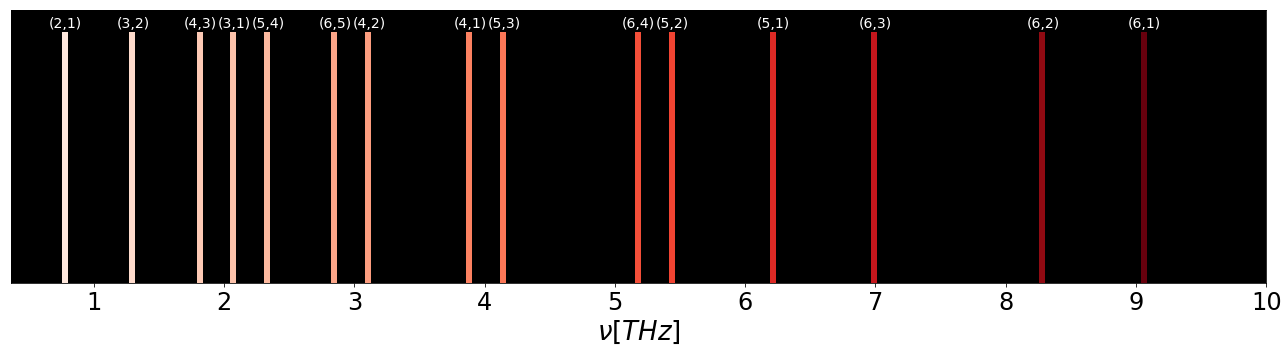

In [13]:
fig,axes = plt.subplots(ncols=1,nrows=1,figsize=(18,5))

jet = cm = plt.get_cmap('Reds') 

cNorm  = colors.Normalize(vmin=0, vmax=νmax)

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

for i in range(len(nl)):
    colorVal  = scalarMap.to_rgba(νl[i])
    axes.plot( [νl[i],νl[i]],[0,1], c=colorVal,lw=6 )
    axes.annotate('({0:g},{1:g})'.format(nl[i],ml[i]), xy=(νl[i],1),xytext=(νl[i]-0.12,1.03),color='white',fontsize=14)
axes.set_ylim(0,1.1)
axes.set_yticks([])
axes.set_facecolor('black')
# axes.grid()
xticks = arange(1,11)
axes.set_xticks(xticks)
axes.set_xticklabels( ['{0}'.format(x) for x in xticks ],fontsize=24 )
axes.tick_params(axis='x', colors='black')
axes.set_xlabel(r'$\nu [THz]$',fontsize=26)
fig.tight_layout()
fig.savefig('espectro.pdf')

In [7]:
νl.max()
νl.min()

0.7764843749999999